In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Current device", device)

Current device cpu


# Data

In [ ]:
m = -3.0
c = 5.0

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = m * X + c

In [ ]:
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

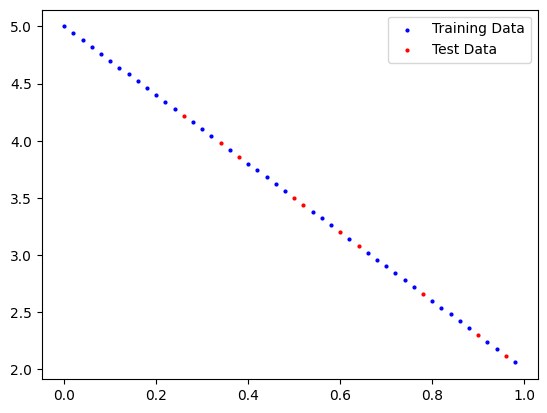

In [ ]:
plt.scatter(X_train, y_train, c='b', s=4, label="Training Data")
plt.scatter(X_test, y_test, c='r', s=4, label="Test Data")
plt.legend(prop={'size': 10})

# Building Linear Model

In [ ]:
class LinearRegModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Here we use nn.Linear() for creating the model params
    # o/w we would have initialized manually like self.weights = nn.Parameter(torch.randn) and self.bias ...
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
    # also called linear transform, probing layer, fully connected layer, dense layer

  # Stil we have to overwrite the forward() method
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
my_model = LinearRegModel()
# my_model.state_dict()

In [ ]:
# params = my_model.parameters()
# weights = next(params)
# weights.device
my_model.to(device)
next(my_model.parameters()).device

device(type='cpu')

.parameters() returns an iterator over all the parameters (typically weights and biases) of the model.
We can check the device of each separate tensor

# Training Model

# Steps for Model training
1. Loss fn
2. Optimizer
3. Training loop
4. Testing loop

In [ ]:
# Loss func
loss_fn = nn.L1Loss() # = MAE

# Setup Optimizer
optimizer = torch.optim.SGD(params = my_model.parameters(), lr=0.1)

In [ ]:
# Training Loop
torch.manual_seed(42)

epochs = 400

for epoch in range(epochs):
  my_model.train()

  # 1. Forward pass
  y_pred = my_model(X_train)

  # 2. Loss fn
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backprop
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing loop
  my_model.eval()
  with torch.inference_mode():
    test_pred = my_model(X_test)
    test_loss = loss_fn(test_pred, y_test)

    # Print whats happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Train Loss: 2.4175992012023926 | Test Loss: 1.8290719985961914
Epoch: 10 | Train Loss: 1.5028712749481201 | Test Loss: 1.0418494939804077
Epoch: 20 | Train Loss: 1.2547035217285156 | Test Loss: 0.8549613952636719
Epoch: 30 | Train Loss: 1.1524895429611206 | Test Loss: 0.7682753205299377
Epoch: 40 | Train Loss: 1.0760259628295898 | Test Loss: 0.7348898649215698
Epoch: 50 | Train Loss: 1.0146431922912598 | Test Loss: 0.7017453908920288
Epoch: 60 | Train Loss: 0.9569867849349976 | Test Loss: 0.6664954423904419
Epoch: 70 | Train Loss: 0.9011909365653992 | Test Loss: 0.6271845102310181
Epoch: 80 | Train Loss: 0.8453389406204224 | Test Loss: 0.5878738164901733
Epoch: 90 | Train Loss: 0.7895660400390625 | Test Loss: 0.5490705370903015
Epoch: 100 | Train Loss: 0.7337141036987305 | Test Loss: 0.509759783744812
Epoch: 110 | Train Loss: 0.6779412031173706 | Test Loss: 0.47095656394958496
Epoch: 120 | Train Loss: 0.6220892667770386 | Test Loss: 0.43164578080177307
Epoch: 130 | Train Los

In [ ]:
my_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-2.9611]])),
             ('linear_layer.bias', tensor([5.0300]))])

In [ ]:
m, c

(-3.0, 5.0)

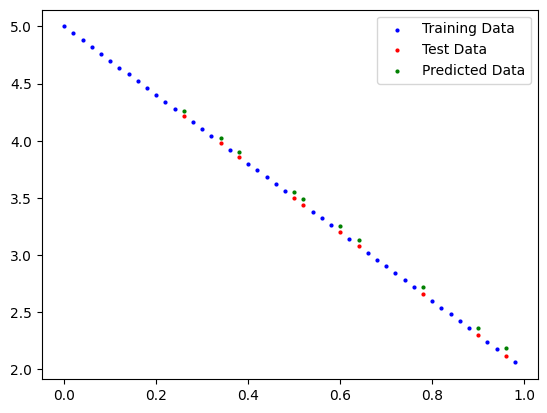

In [ ]:
my_model.eval()
with torch.inference_mode():
  y_preds = my_model(X_test)
  plt.scatter(X_train, y_train, c='b', s=4, label="Training Data")
  plt.scatter(X_test, y_test, c='r', s=4, label="Test Data")
  plt.scatter(X_test, y_preds, c='g', s=4, label="Predicted Data")
  plt.legend(prop={'size': 10})

# Save and Load the model

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "my_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Model saved to: {MODEL_SAVE_PATH}")
torch.save(obj=my_model.state_dict(), f=MODEL_SAVE_PATH)

Model saved to: models/my_model.pth


In [ ]:
# Load model
loaded_model = LinearRegModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>